In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from calc_footprint_FFP_adjusted01 import FFP

In [3]:
a = FFP()

In [4]:
output = a.output(zm=9., umean=2, h=5000, ol=-1000, sigmav=0.6, ustar=0.3, wind_dir=210,rs= [0.3,0.5,0.9],crop=False, fig=False)

In [38]:
# [list(np.array(output[8][-1]) + 100)]

[[95.07259167688541,
  95.70481229826821,
  96.3324714288601,
  96.9558064597256,
  97.57489492855778,
  98.18965929766358,
  98.79986217597846,
  98.97932092504061,
  99.41465848176877,
  100.03246064003336,
  100.64931456159982,
  101.2650891357197,
  101.87961241143253,
  102.49266083990372,
  103.10394479038312,
  103.71308906100188,
  104.31960659734204,
  104.92286291303927,
  105.52202768265184,
  106.1160085075258,
  106.70335973224306,
  107.28215610118377,
  107.849816523285,
  108.40285654853568,
  108.59488066611561,
  108.98049613673112,
  109.57176806917867,
  110.1556934690815,
  110.72995117027482,
  111.29138098928873,
  111.83565184624702,
  112.32071090695716,
  112.36235063663102,
  112.93455042483107,
  113.49402955251759,
  114.03644936161723,
  114.55582692508368,
  114.82882755297166,
  115.08102415044715,
  115.6236465130433,
  116.14482548025858,
  116.63697856818939,
  116.70484665360334,
  117.16046218976771,
  117.66940483600823,
  118.14711426905644,
  118

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [7]:
from matplotlib.path import Path

In [8]:
len(output[8])

3

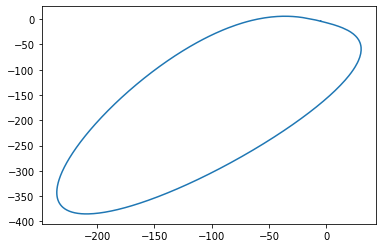

In [9]:
plt.plot(output[8][2], output[9][2])

In [10]:
poly = [(i, j) for i, j in zip(output[8][2], output[9][2])]
poly_shp = Polygon(poly)
poly_mpl = Path(poly)

In [11]:
x = np.arange(-1000, 1000, 10)
y = np.arange(-1000, 1000, 10)
xx, yy = np.meshgrid(x, y)

In [12]:
len(x)

200

In [13]:
x_utm=203917.07880027
y_utm=7545463.6805863


In [26]:
output_x_utm = np.array(output[8][2]) + x_utm
output_y_utm = np.array(output[9][2]) + y_utm

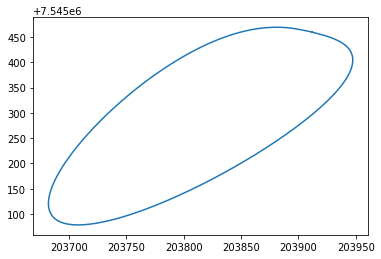

In [28]:
plt.plot(output_x_utm, output_y_utm)

In [14]:
xx, yy = xx.flatten(), yy.flatten()
points = np.vstack((xx,yy)).T

In [15]:
grid = poly_mpl.contains_points(points)

In [16]:
mask = grid.reshape(len(x),len(y))

In [17]:
x2 = x + x_utm
y2 = y + y_utm

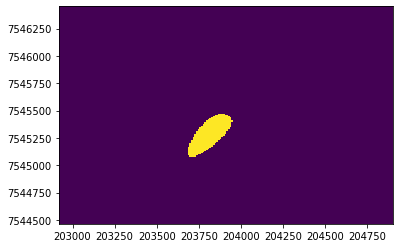

In [18]:
plt.pcolormesh(x2,y2,mask)

In [19]:
from numpy import ma

In [20]:
tif_file = '..\..\iab3_site\IAB1_SIRGAS_23S.tif'
I = plt.imread(tif_file)

In [21]:
import rasterio
import rasterio.plot

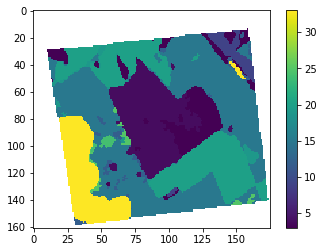

In [22]:
plt.imshow(ma.masked_where(I==255,I))
plt.colorbar()

AttributeError: 'AxesSubplot' object has no attribute 'rasterio'

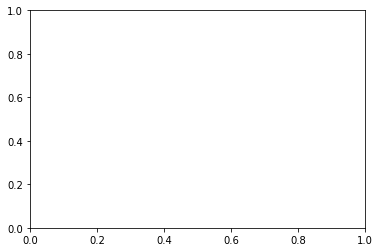

In [33]:
with rasterio.open(tif_file) as src:
    fig, ax = plt.subplots()
    ax.rasterio.plot.show(src)
    ax.plot(output_x_utm, output_y_utm)

In [29]:
import geopandas as gpd

In [31]:
gdf = gpd.GeoDataFrame()